In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import pandas as pd
from numpy.random import random
import datetime as dt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from scipy.signal import periodogram
import math

from pytsviz.viz import *

In [3]:
dataset_size=366

In [4]:
n_features = 3

Target series

In [5]:
t_axis = pd.date_range(start='1/1/2020', periods = dataset_size, freq="D", name="t")

In [6]:
y = (1 + random(dataset_size)) * np.linspace(6, 9, dataset_size) + \
    (1 + random(dataset_size)) * np.sin(np.linspace(0, 10*np.pi, dataset_size)) + \
    (1.5 + random(dataset_size)) * np.cos(np.linspace(0, 5.4*np.pi, dataset_size))
ts = pd.Series(index=t_axis, data=y, name="y")
ts_df = ts.to_frame()

Features

In [7]:
feat_matrix = random((n_features, dataset_size))
feat_df = pd.DataFrame(index=t_axis, data={f"x_{i}": feat_matrix[i] for i in range(n_features)})

Forecast

In [8]:
ext_t_axis = pd.date_range(start='2/1/2020', periods = dataset_size, freq="D", name="t")

In [9]:
y_hat = y * (1 + 0.1 * random())

forecast = pd.Series(index=ext_t_axis, data=y_hat, name="y_hat")
forecast_df = forecast.to_frame()

In [10]:
c_lower = [y_hat[i] - (0.001 * i) ** 1.2 for i in range(len(y_hat))]
c_upper = [y_hat[i] + (0.001 * i) ** 1.2 for i in range(len(y_hat))]
confidence_df = pd.DataFrame(index=ext_t_axis, data={"lower confidence": c_lower, "upper confidence": c_upper})

In [11]:
total_df = pd.concat([ts, feat_df, forecast_df, confidence_df], axis = 1)

In [12]:
total_df

y       x_0       x_1       x_2      y_hat  \
t                                                                
2020-01-01   9.852646  0.345951  0.021539  0.574240        NaN   
2020-01-02   8.119307  0.964688  0.750480  0.097798        NaN   
2020-01-03  11.196293  0.540383  0.641784  0.995533        NaN   
2020-01-04  10.566881  0.106290  0.501826  0.743217        NaN   
2020-01-05   8.861661  0.966134  0.953002  0.851235        NaN   
...               ...       ...       ...       ...        ...   
2021-01-27        NaN       NaN       NaN       NaN  12.845602   
2021-01-28        NaN       NaN       NaN       NaN  16.712061   
2021-01-29        NaN       NaN       NaN       NaN  16.562002   
2021-01-30        NaN       NaN       NaN       NaN  10.502831   
2021-01-31        NaN       NaN       NaN       NaN  14.236550   

            lower confidence  upper confidence  
t                                               
2020-01-01               NaN               NaN  
2020-01-02               NaN               NaN  
2020-01-03               NaN               NaN  
2020-01-04               NaN               NaN  
2020-01-05               NaN               NaN  
...                      ...               ...  
2021-01-27         12.551154         13.140050  
2021-01-28         16.416634         17.007488  
2021-01-29         16.265595         16.858408  
2021-01-30         10.205445         10.800218  
2021-01-31         13.938182         14.534917  

[397 rows x 7 columns]

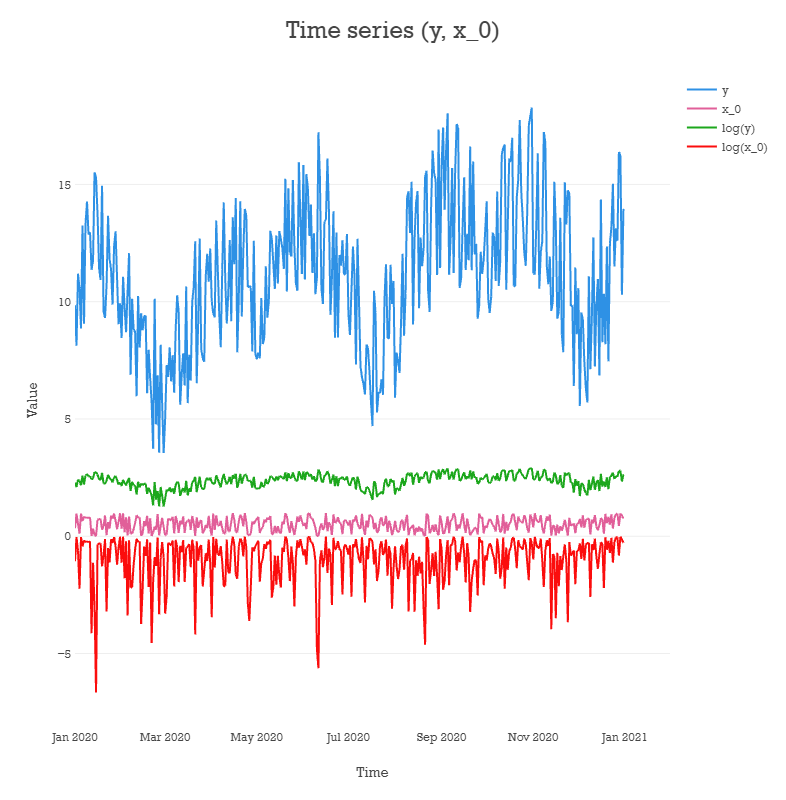

In [13]:
fig = time_series_plot(total_df, y_cols=["y", "x_0"], tf="log", tf_args = (np.e,), keep_original=True)

In [14]:
func1 = lambda x : x.isocalendar().week
func2 = lambda x : x.isocalendar().day

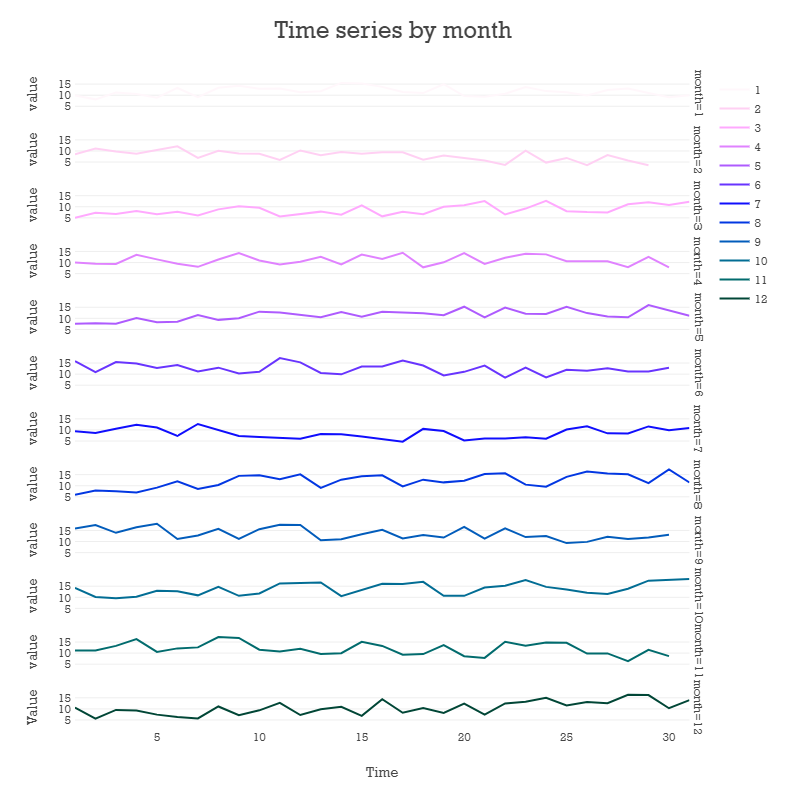

In [15]:
seasonal_time_series_plot(ts_df, period="month", subplots=True)

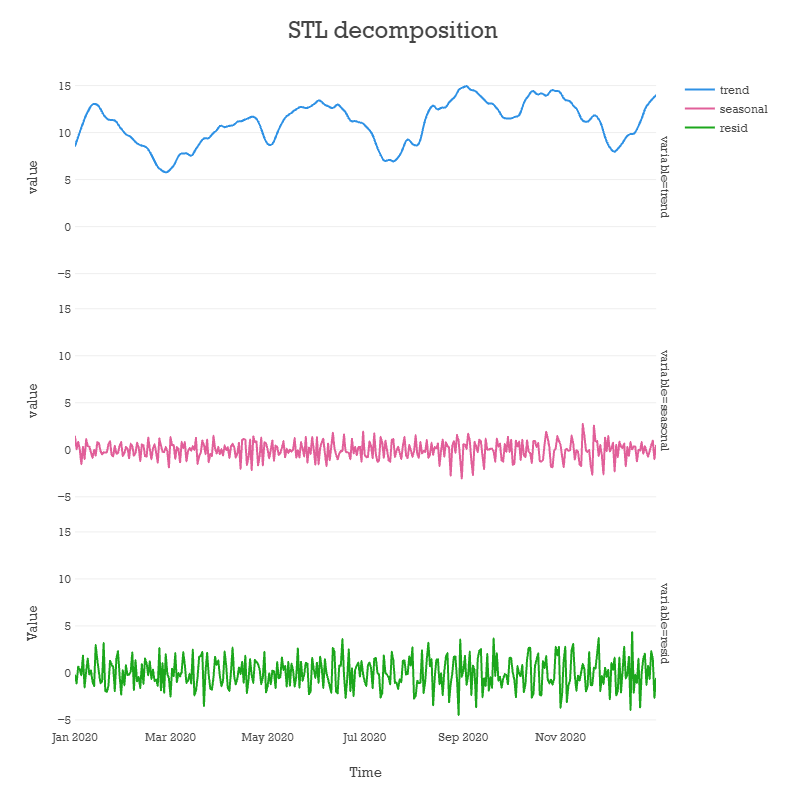

In [16]:
decomposed_time_series_plot(ts, method = "STL", subplots = True)

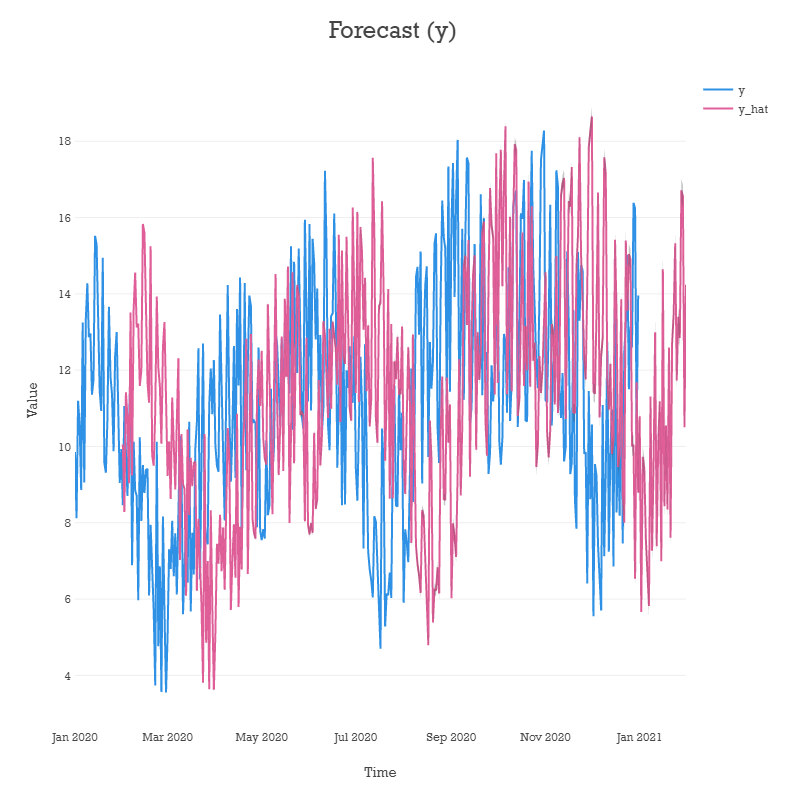

In [17]:
inverted_df = pd.DataFrame(total_df.values[::-1], total_df.index, total_df.columns)
#forecast_plot(inverted_df, ts_col = "y", fc_cols = ["y_hat"], lower_col = "lower confidence", upper_col = "upper confidence")

y_hat_2 = pd.Series(data=y_hat*0.9, index = ext_t_axis, name = "y_hat_2")
multiple_fc_df = pd.concat([total_df, y_hat_2], axis = 1)
forecast_plot(multiple_fc_df, y_col = "y", fc_cols = ["y_hat"], upper_col = "upper confidence", lower_col = "lower confidence")

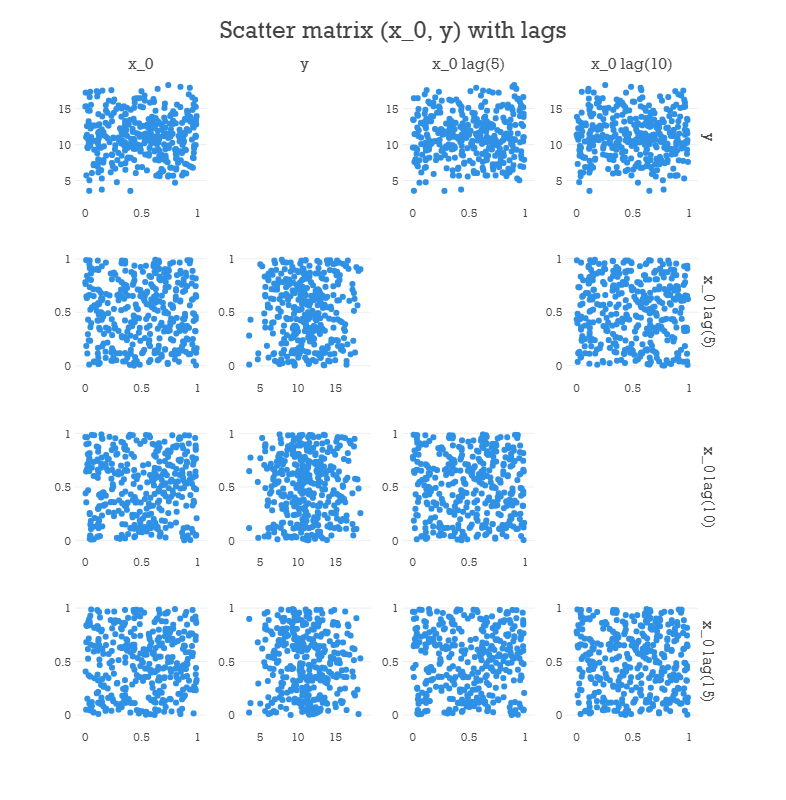

In [18]:
vars_scatterplot(total_df, var1 = "x_0", var2="y", lags1 = [5, 10, 15])

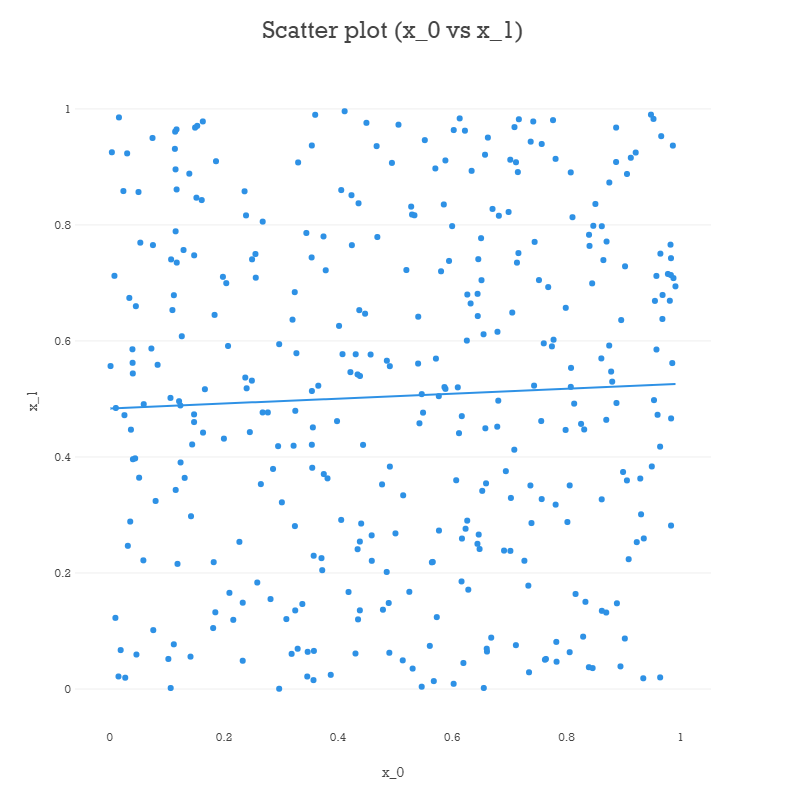

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6525
Date:                Tue, 02 Mar 2021   Prob (F-statistic):              0.420
Time:                        10:33:15   Log-Likelihood:                -69.382
No. Observations:                 366   AIC:                             142.8
Df Residuals:                     364   BIC:                             150.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4836      0.031     15.721      0.0

In [19]:
scatterplot(total_df, "x_0", "x_1", fit = "summary")

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



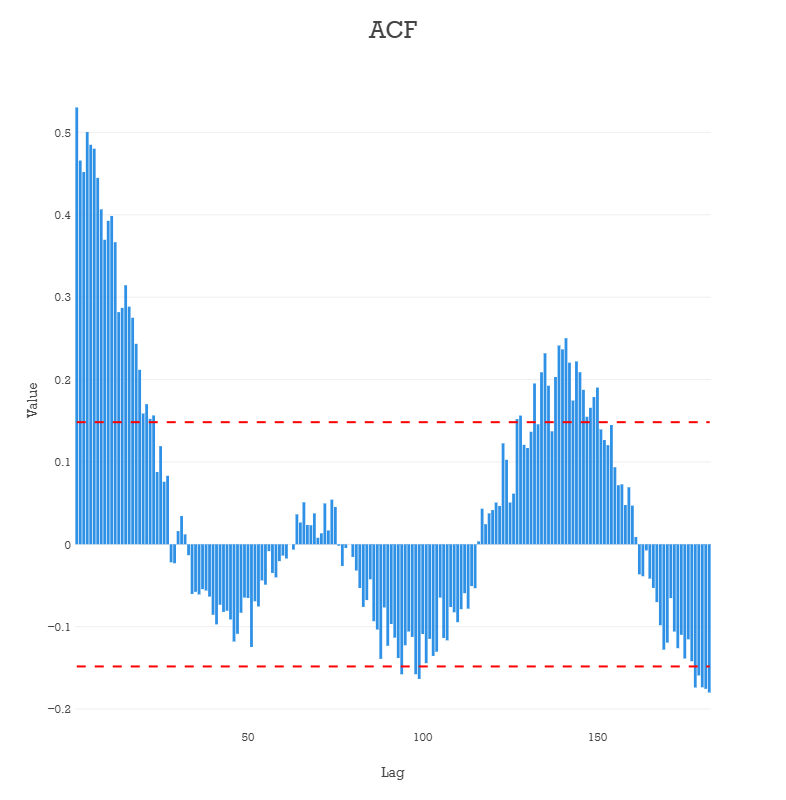

In [20]:
plotly_acf(ts_df, show_threshold = True)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



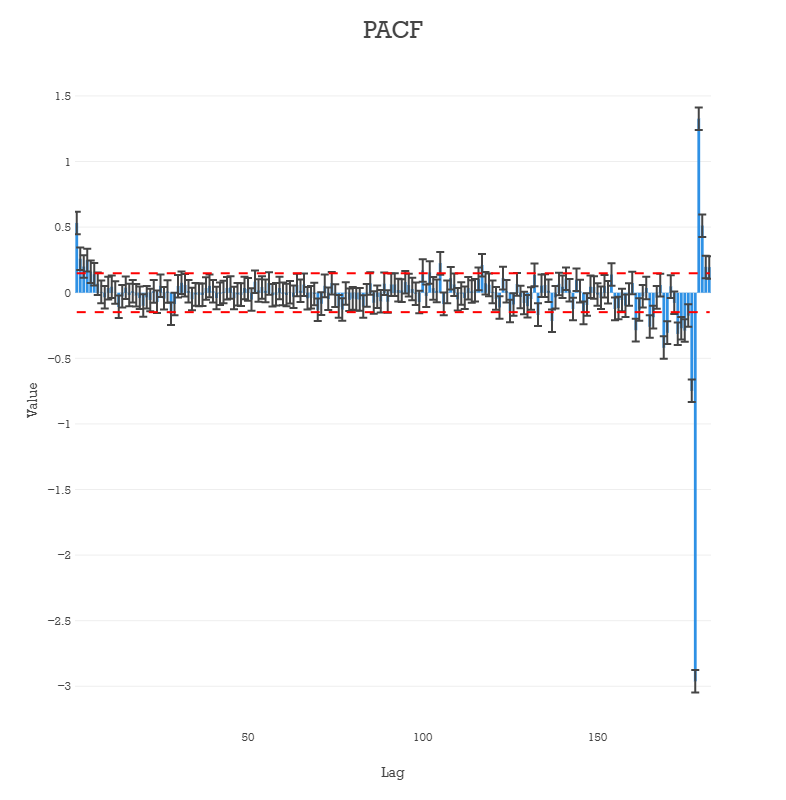

In [21]:
plotly_acf(ts_df, partial=True, alpha = 0.1, show_threshold = True)

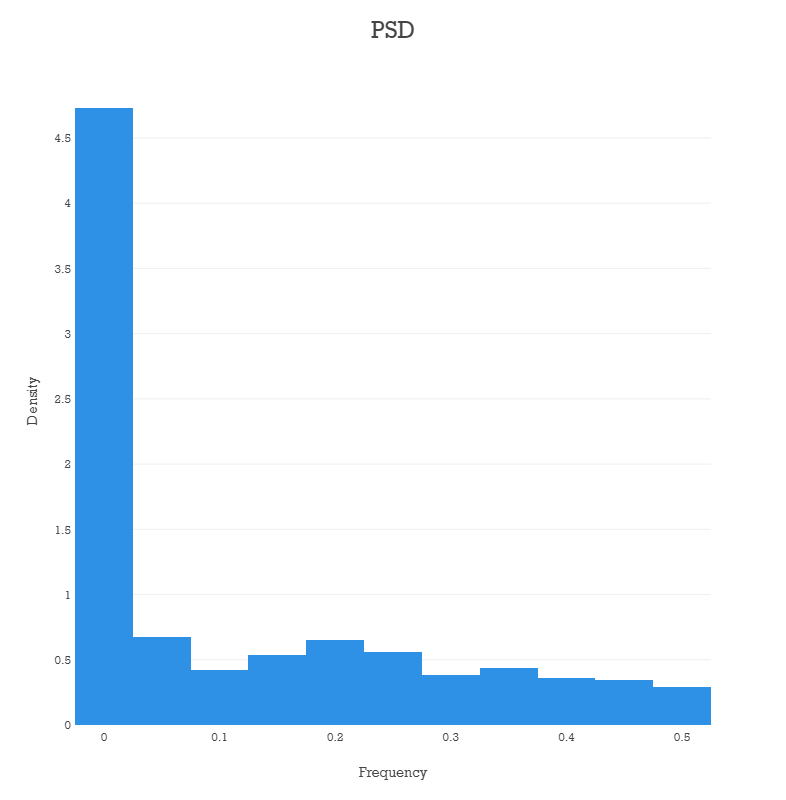

In [22]:
plotly_psd(ts_df, scaling="spectrum")

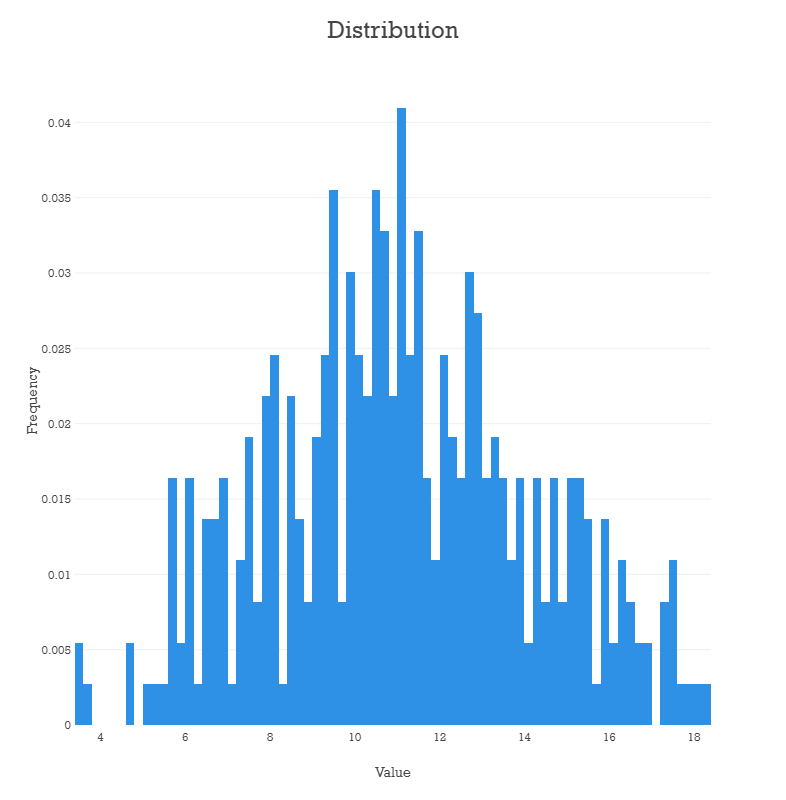

In [23]:
plot_distribution_histogram(ts_df, bins=100, title="Distribution")

In [24]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

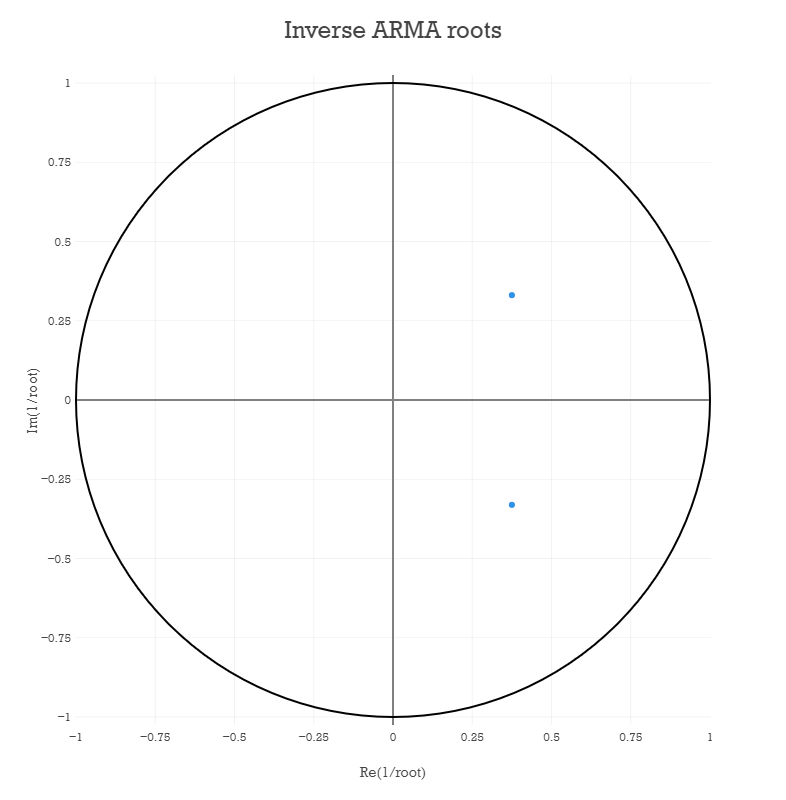

In [25]:
inverse_arma_roots_plot(arma_process)

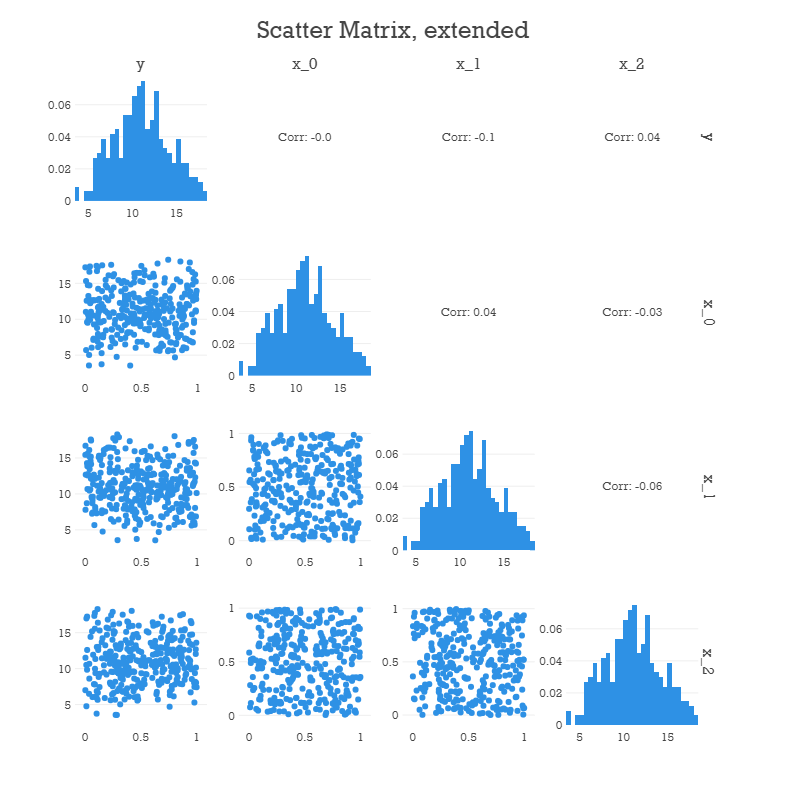

In [26]:
composite_matrix_scatterplot(total_df.dropna(), y_cols=["y", "x_0", "x_1", "x_2"])

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



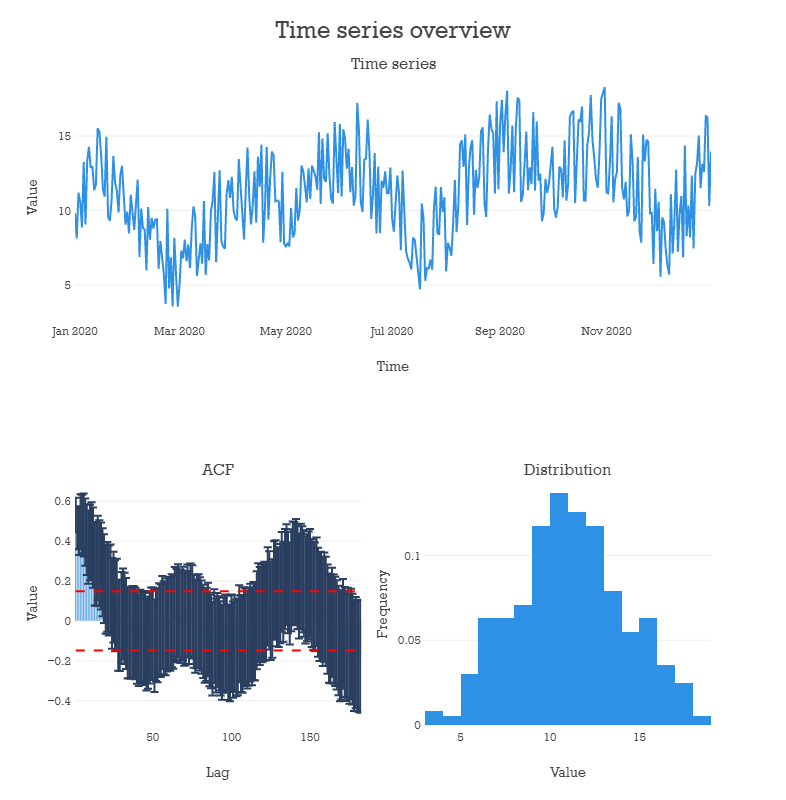

In [27]:
composite_summary_plot(ts_df)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



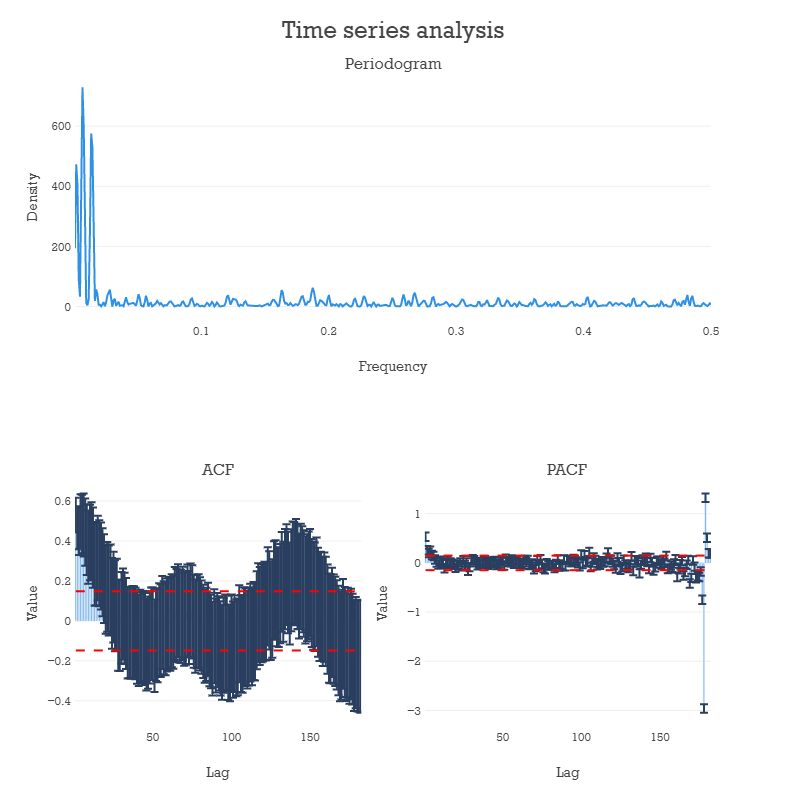

In [28]:
plotly_tsdisplay(ts_df)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



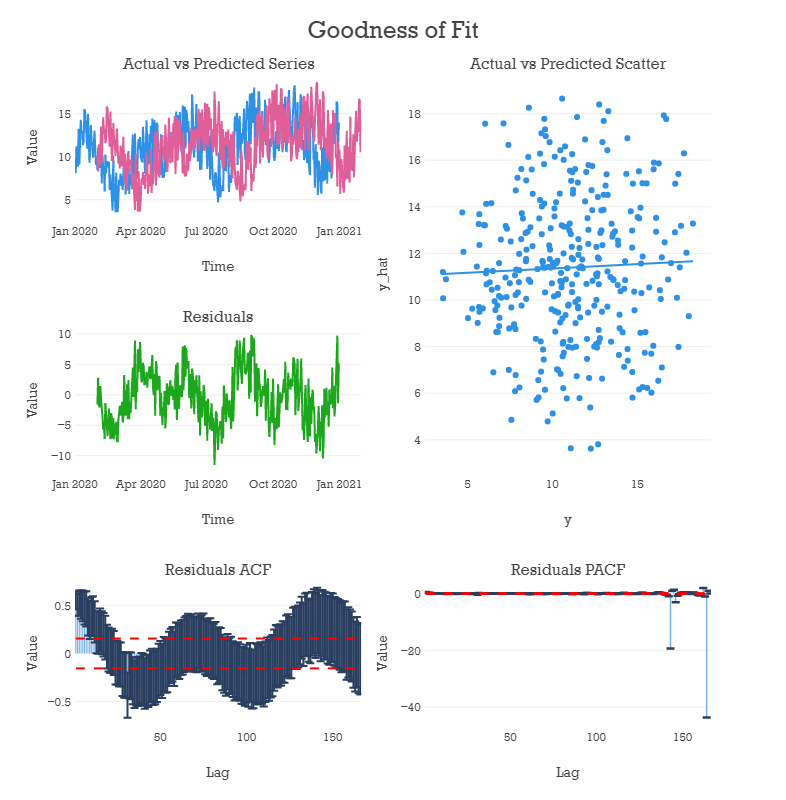

In [29]:
plot_gof(total_df, "y", "y_hat")